# Tic-Tac-Toe Reinforcement Learning Experiments

This notebook contains all the tic-tac-toe RL experiments in a Jupyter format.

## 1. Import Dependencies

In [3]:
import csv
import matplotlib.pyplot as plt
import numpy as np
from agents import Agent, Teacher, Human
from game_logic import play, PLAYER_X, PLAYER_O
from measure_with_random import measure_performance_vs_random

# Set up matplotlib for inline plotting
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

## 2. Alpha Comparison Experiment

Test different learning rates (alpha values) to see how they affect agent performance.

In [3]:
def run_experiment_with_alpha(alpha_value, episodes=10000):
    """Run training experiment with specific alpha value"""
    print(f"\n=== Running experiment with alpha = {alpha_value} ===")
    
    # Create agents with specified alpha
    p1 = Agent(PLAYER_X, lossval=-1, alpha=alpha_value)
    p2 = Agent(PLAYER_O, lossval=-1, alpha=alpha_value)
    teacher_o = Teacher(level=0.9)
    teacher_x = Teacher(level=0.9)
    
    # Track data
    perf = [[] for _ in range(7)]  # episode, p1-win, p1-lose, p1-draw, p2-win, p2-lose, p2-draw
    training_episodes = []
    agent1_training_wins = []
    agent2_training_wins = []
    agent1_recent_results = []
    agent2_recent_results = []
    
    for i in range(episodes):
        # Evaluate vs random every 100 episodes
        if i % 10 == 0:
            if i % 1000 == 0:
                print(f'Episode: {i}')
            probs = measure_performance_vs_random(p1, p2, games=100)
            perf[0].append(i)
            for idx, x in enumerate(probs):
                perf[idx + 1].append(x)
        
        # Track training vs teacher every 1000 episodes
        if i % 1000 == 0:
            training_episodes.append(i)
            if agent1_recent_results:
                agent1_wins = sum(1 for w in agent1_recent_results if w == PLAYER_X)
                agent1_training_wins.append(agent1_wins / len(agent1_recent_results))
            else:
                agent1_training_wins.append(0)
                
            if agent2_recent_results:
                agent2_wins = sum(1 for w in agent2_recent_results if w == PLAYER_O)
                agent2_training_wins.append(agent2_wins / len(agent2_recent_results))
            else:
                agent2_training_wins.append(0)
            
            agent1_recent_results = []
            agent2_recent_results = []
        
        # Training: alternating agent vs teacher
        if i % 2 == 0:
            winner = play(p1, teacher_o)
            p1.episode_over(winner)
            agent1_recent_results.append(winner)
        else:
            winner = play(teacher_x, p2)
            p2.episode_over(winner)
            agent2_recent_results.append(winner)
    
    return {
        'alpha': alpha_value,
        'evaluation_data': perf,
        'training_episodes': training_episodes,
        'agent1_training_wins': agent1_training_wins,
        'agent2_training_wins': agent2_training_wins,
        'trained_agents': (p1, p2)
    }

In [5]:
# Run alpha comparison experiments
alpha_values = [0.01, 0.1, 0.5, 0.99]
all_results = {}

print("Starting Alpha Comparison Experiments...")
for alpha in alpha_values:
    results = run_experiment_with_alpha(alpha)
    all_results[alpha] = results
    
print("\nAll experiments completed!")

Starting Alpha Comparison Experiments...

=== Running experiment with alpha = 0.01 ===
Episode: 0
Episode: 1000
Episode: 2000
Episode: 3000
Episode: 4000
Episode: 5000
Episode: 6000
Episode: 7000
Episode: 8000
Episode: 9000

=== Running experiment with alpha = 0.1 ===
Episode: 0
Episode: 1000
Episode: 2000
Episode: 3000
Episode: 4000
Episode: 5000
Episode: 6000
Episode: 7000
Episode: 8000
Episode: 9000

=== Running experiment with alpha = 0.5 ===
Episode: 0
Episode: 1000
Episode: 2000
Episode: 3000
Episode: 4000
Episode: 5000
Episode: 6000
Episode: 7000
Episode: 8000
Episode: 9000

=== Running experiment with alpha = 0.99 ===
Episode: 0
Episode: 1000
Episode: 2000
Episode: 3000
Episode: 4000
Episode: 5000
Episode: 6000
Episode: 7000
Episode: 8000
Episode: 9000

All experiments completed!


## 3. Visualize Alpha Comparison Results

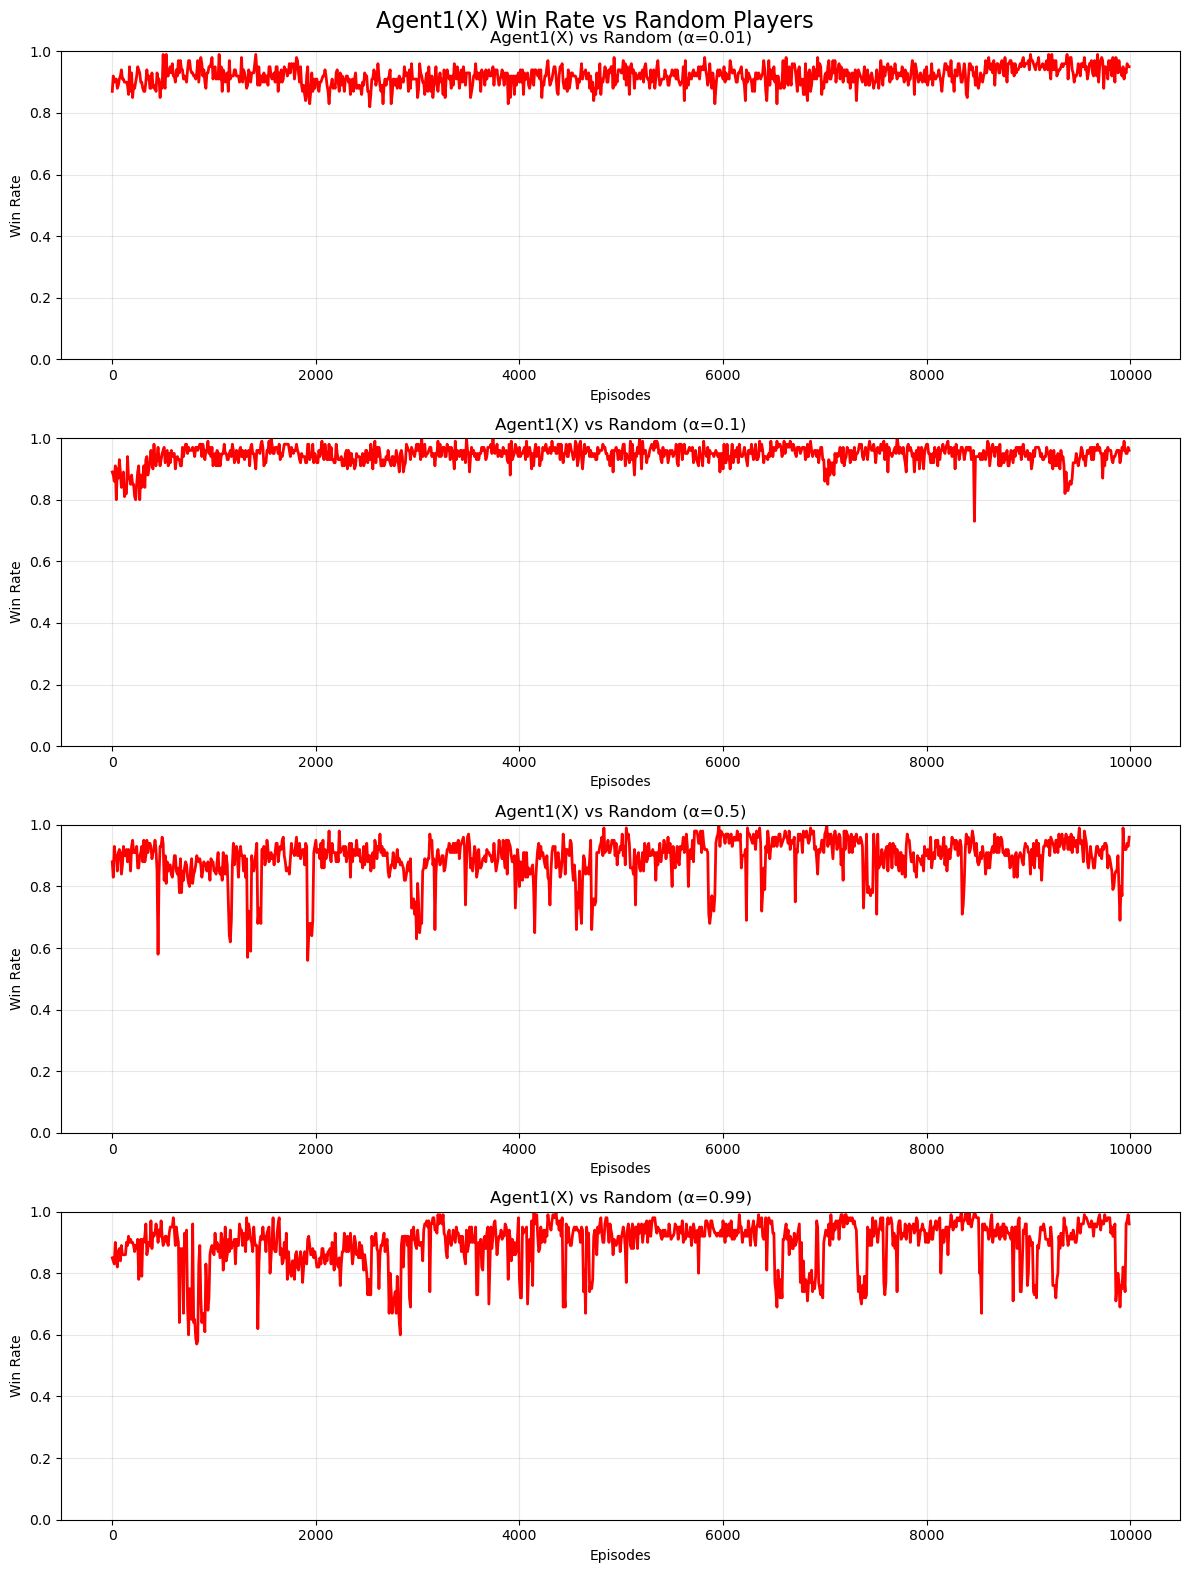

In [7]:
# Agent1(X) Win Rate vs Random
fig1, ax1 = plt.subplots(4, 1, figsize=(12, 16))

for row, alpha in enumerate(alpha_values):
    data = all_results[alpha]['evaluation_data']
    ax1[row].plot(data[0], data[1], color='red', linewidth=2)
    ax1[row].set_title(f'Agent1(X) vs Random (α={alpha})')
    ax1[row].set_xlabel('Episodes')
    ax1[row].set_ylabel('Win Rate')
    ax1[row].grid(True, alpha=0.3)
    ax1[row].set_ylim(0, 1)

plt.suptitle('Agent1(X) Win Rate vs Random Players', fontsize=16)
plt.tight_layout()
plt.show()

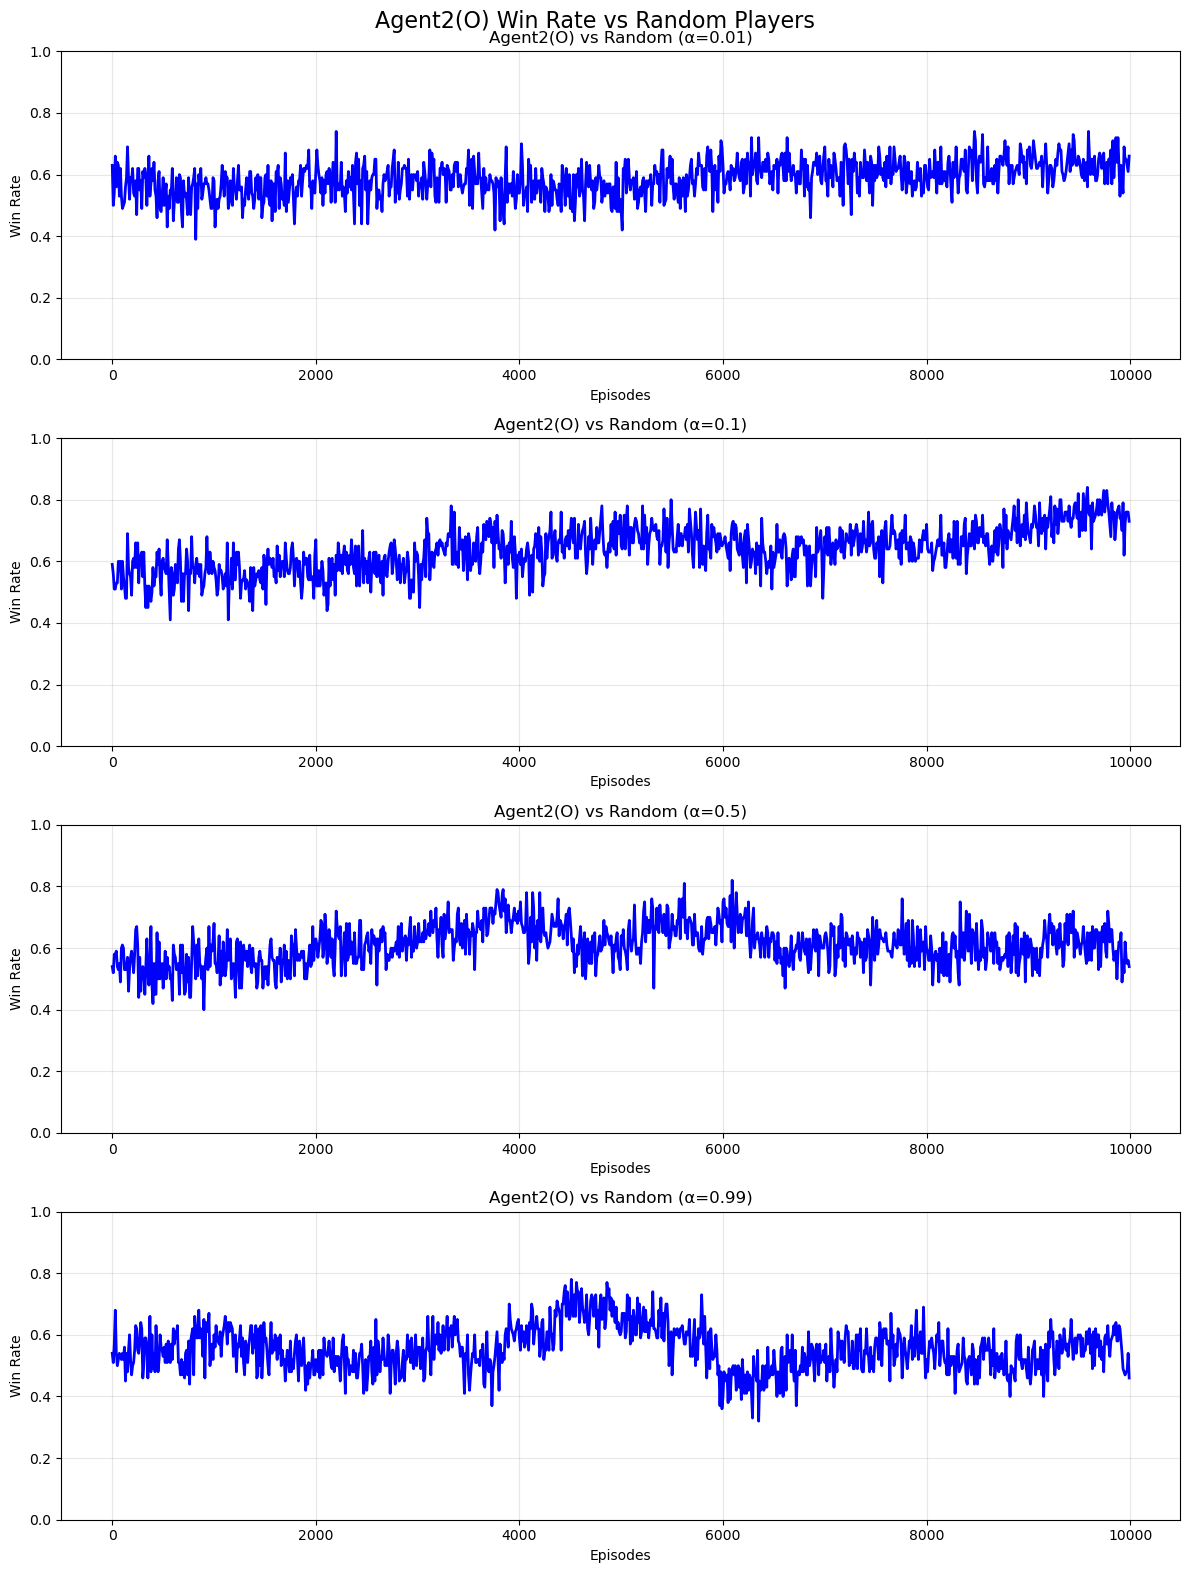

In [47]:
## Agent2(O) Win Rate vs Random
fig2, ax2 = plt.subplots(4, 1, figsize=(12, 16))

for row, alpha in enumerate(alpha_values):
    data = all_results[alpha]['evaluation_data']
    ax2[row].plot(data[0], data[4], color='blue', linewidth=2)
    ax2[row].set_title(f'Agent2(O) vs Random (α={alpha})')
    ax2[row].set_xlabel('Episodes')
    ax2[row].set_ylabel('Win Rate')
    ax2[row].grid(True, alpha=0.3)
    ax2[row].set_ylim(0, 1)

plt.suptitle('Agent2(O) Win Rate vs Random Players', fontsize=16)
plt.tight_layout()
plt.show()

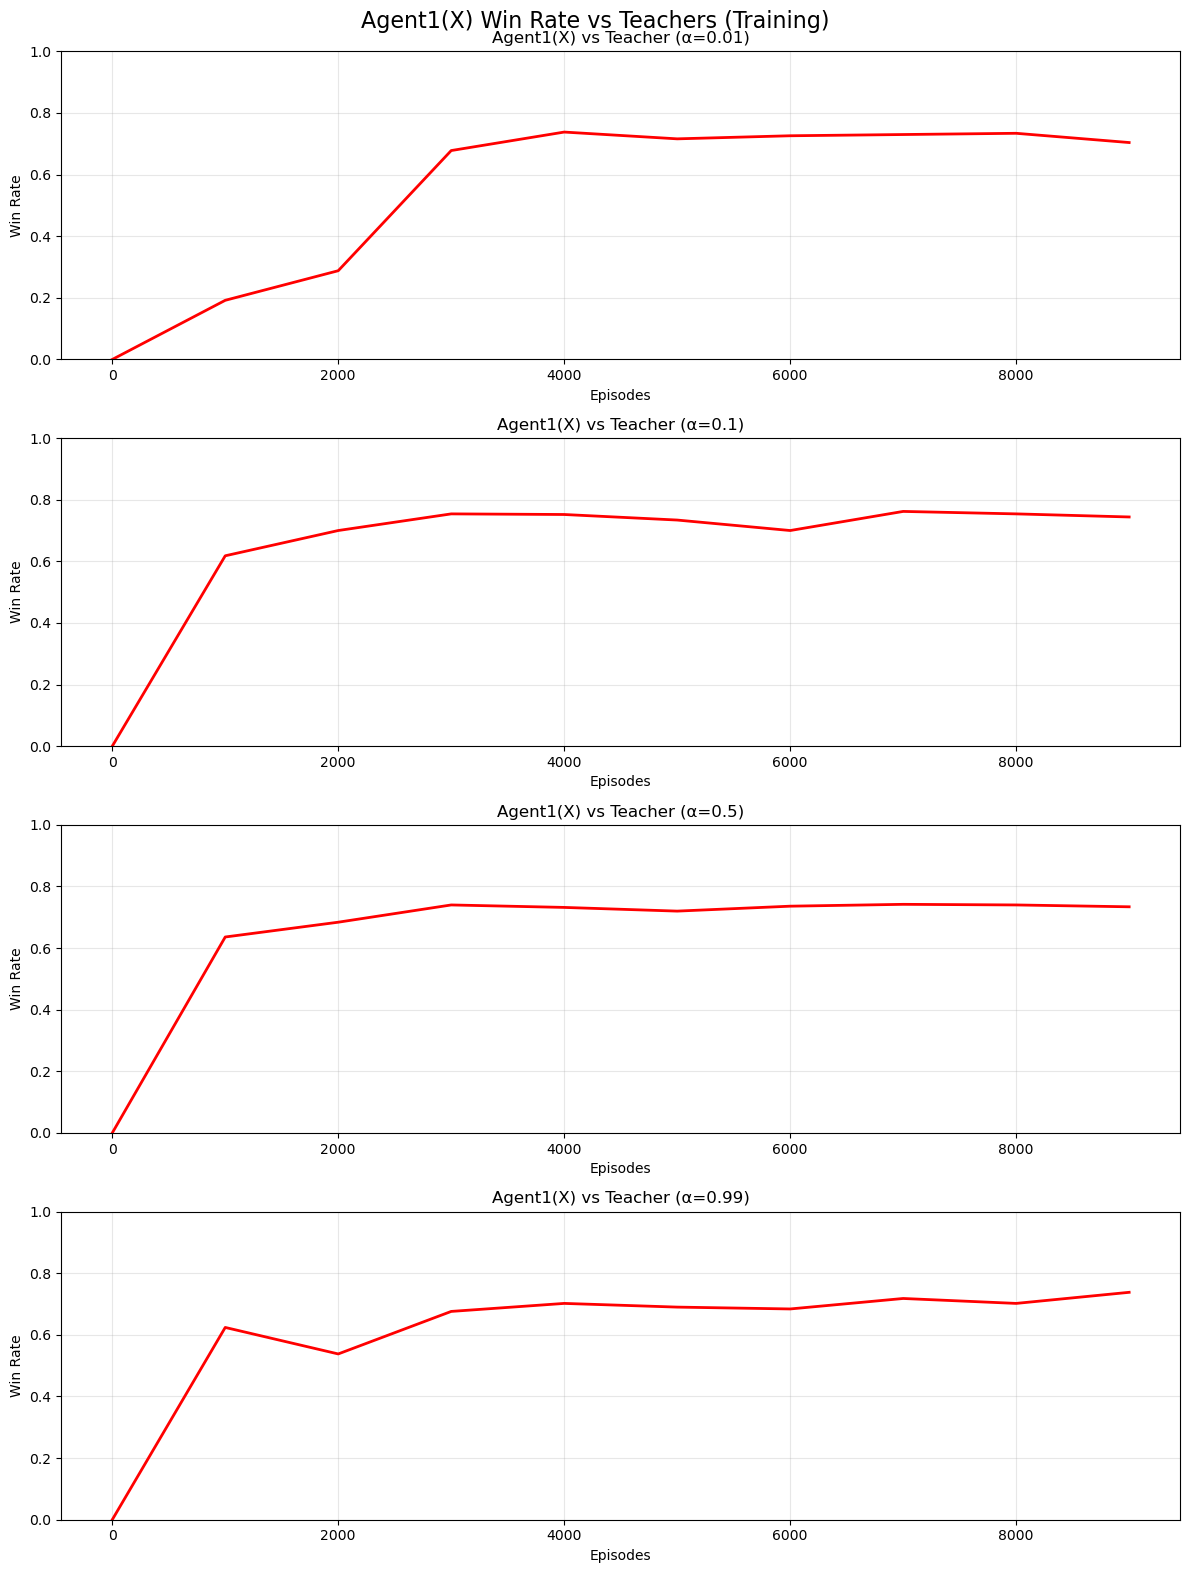

In [11]:
# Agent1(X) Win Rate vs Teacher
fig3, ax3 = plt.subplots(4, 1, figsize=(12, 16))

for row, alpha in enumerate(alpha_values):
    results = all_results[alpha]
    ax3[row].plot(results['training_episodes'], results['agent1_training_wins'], 
            color='red', linewidth=2)
    ax3[row].set_title(f'Agent1(X) vs Teacher (α={alpha})')
    ax3[row].set_xlabel('Episodes')
    ax3[row].set_ylabel('Win Rate')
    ax3[row].grid(True, alpha=0.3)
    ax3[row].set_ylim(0, 1)

plt.suptitle('Agent1(X) Win Rate vs Teachers (Training)', fontsize=16)
plt.tight_layout()
plt.show()

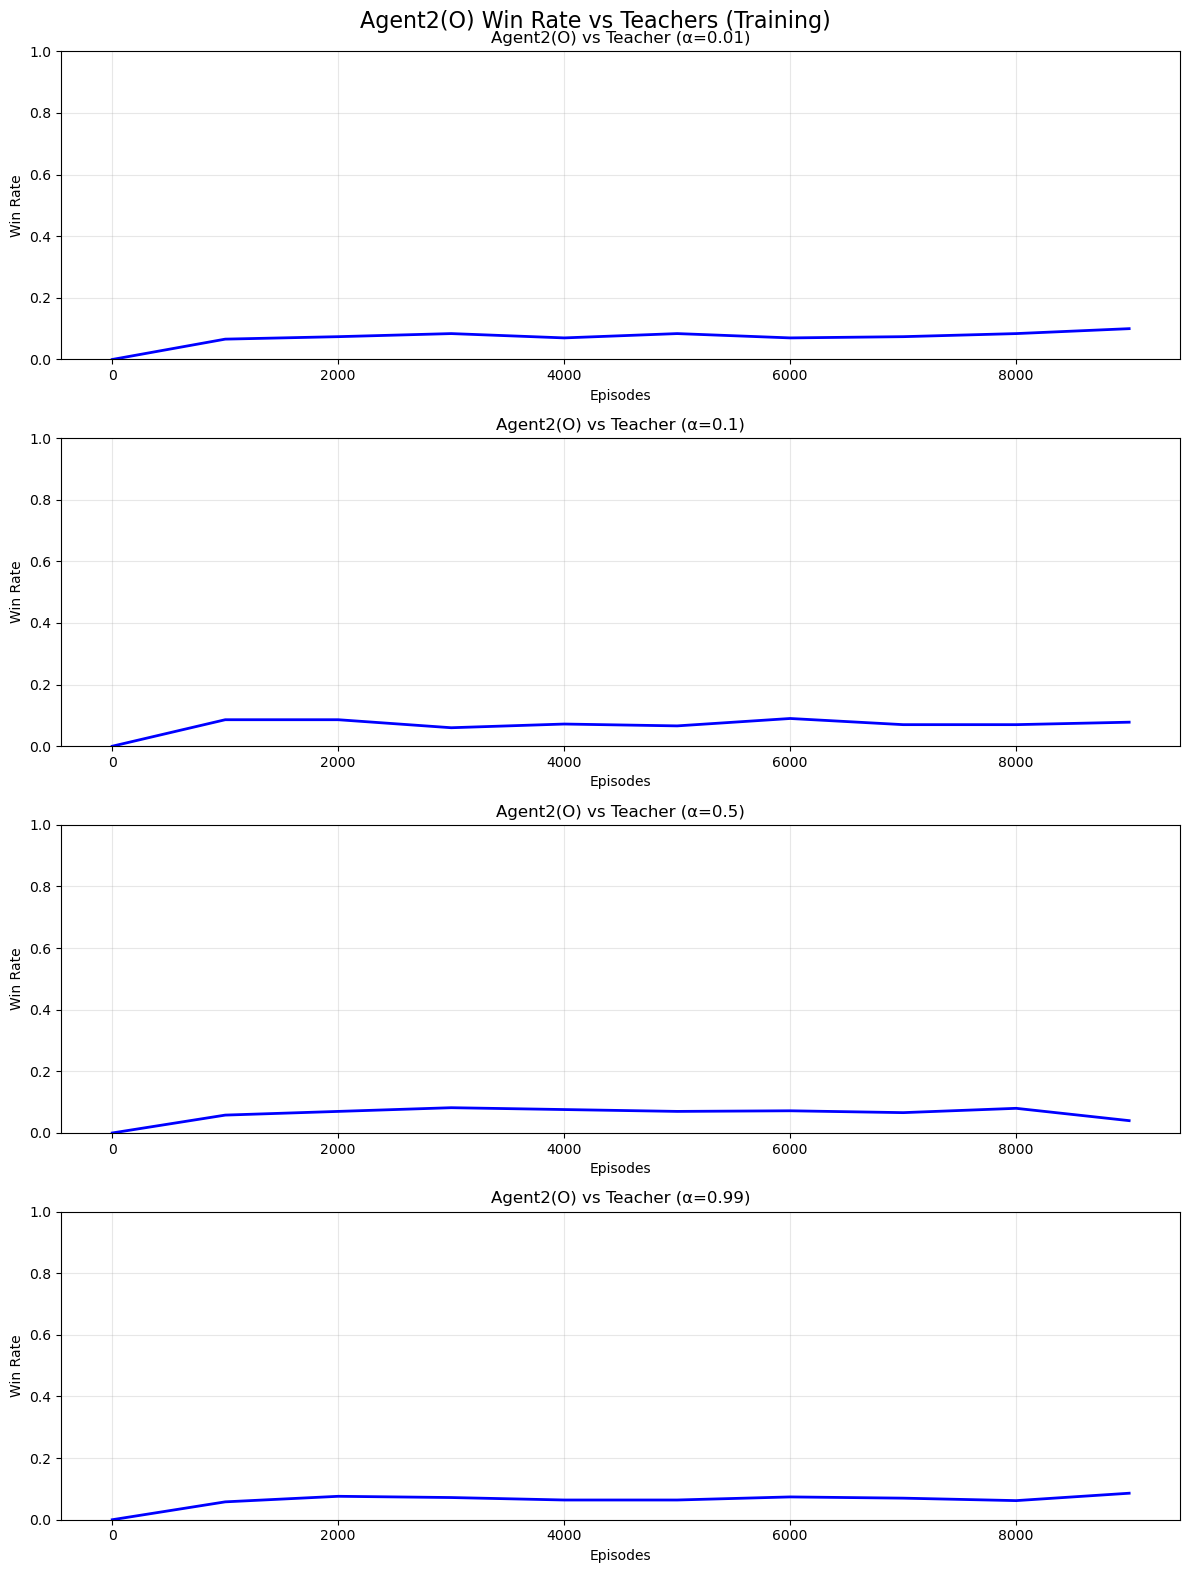

In [13]:
# Agent2(O) Win Rate vs Teacher
fig4, ax4 = plt.subplots(4, 1, figsize=(12, 16))

for row, alpha in enumerate(alpha_values):
    results = all_results[alpha]
    ax4[row].plot(results['training_episodes'], results['agent2_training_wins'], 
            color='blue', linewidth=2)
    ax4[row].set_title(f'Agent2(O) vs Teacher (α={alpha})')
    ax4[row].set_xlabel('Episodes')
    ax4[row].set_ylabel('Win Rate')
    ax4[row].grid(True, alpha=0.3)
    ax4[row].set_ylim(0, 1)

plt.suptitle('Agent2(O) Win Rate vs Teachers (Training)', fontsize=16)
plt.tight_layout()
plt.show()

In [49]:
# Summary of Results
print("\n" + "="*60)
print("FINAL PERFORMANCE SUMMARY")
print("="*60)

for alpha in alpha_values:
    data = all_results[alpha]['evaluation_data']
    final_idx = -1
    
    print(f"\nAlpha = {alpha}:")
    print(f"  Agent1(X): Win={data[1][final_idx]:.3f}, Loss={data[2][final_idx]:.3f}, Draw={data[3][final_idx]:.3f}")
    print(f"  Agent2(O): Win={data[4][final_idx]:.3f}, Loss={data[5][final_idx]:.3f}, Draw={data[6][final_idx]:.3f}")
    
    if all_results[alpha]['agent1_training_wins']:
        train1 = all_results[alpha]['agent1_training_wins'][-1]
        train2 = all_results[alpha]['agent2_training_wins'][-1]
        print(f"  Training: Agent1={train1:.3f}, Agent2={train2:.3f}")


FINAL PERFORMANCE SUMMARY

Alpha = 0.01:
  Agent1(X): Win=0.950, Loss=0.030, Draw=0.020
  Agent2(O): Win=0.660, Loss=0.270, Draw=0.070
  Training: Agent1=0.704, Agent2=0.100

Alpha = 0.1:
  Agent1(X): Win=0.960, Loss=0.040, Draw=0.000
  Agent2(O): Win=0.730, Loss=0.150, Draw=0.120
  Training: Agent1=0.744, Agent2=0.078

Alpha = 0.5:
  Agent1(X): Win=0.960, Loss=0.040, Draw=0.000
  Agent2(O): Win=0.540, Loss=0.390, Draw=0.070
  Training: Agent1=0.734, Agent2=0.040

Alpha = 0.99:
  Agent1(X): Win=0.960, Loss=0.040, Draw=0.000
  Agent2(O): Win=0.460, Loss=0.330, Draw=0.210
  Training: Agent1=0.738, Agent2=0.086


## 4. Single Alpha Detailed Experiment

Run a detailed experiment with a single alpha value and interactive gameplay.

In [17]:
# Create learning agents and teachers for detailed experiment
p1_detailed = Agent(PLAYER_X, lossval=-1,alpha=0.99)
p2_detailed = Agent(PLAYER_O, lossval=-1,alpha=0.99)
teacher_o_detailed = Teacher(level=0.9)
teacher_x_detailed = Teacher(level=0.9)

series = ['P1-Win', 'P1-Lose', 'P1-Draw', 'P2-Win', 'P2-Lose', 'P2-Draw']
perf_detailed = [[] for _ in range(len(series) + 1)]

# Track training performance vs teacher
training_episodes_detailed = []
agent1_training_wins_detailed = []
agent2_training_wins_detailed = []
agent1_recent_results_detailed = []
agent2_recent_results_detailed = []

print("Starting detailed single-alpha experiment...")

for i in range(10000):
    # Evaluate vs random every 10 episodes
    if i % 10 == 0:
        if i % 1000 == 0:
            print('Episode: {0}'.format(i))
        probs = measure_performance_vs_random(p1_detailed, p2_detailed, games=100)
        perf_detailed[0].append(i)
        for idx, x in enumerate(probs):
            perf_detailed[idx + 1].append(x)

    # Track training performance vs teacher every 1000 episodes
    if i % 1000 == 0:
        training_episodes_detailed.append(i)
        if agent1_recent_results_detailed:
            agent1_wins = sum(1 for w in agent1_recent_results_detailed if w == PLAYER_X)
            agent1_training_wins_detailed.append(agent1_wins / len(agent1_recent_results_detailed))
        else:
            agent1_training_wins_detailed.append(0)
            
        if agent2_recent_results_detailed:
            agent2_wins = sum(1 for w in agent2_recent_results_detailed if w == PLAYER_O)
            agent2_training_wins_detailed.append(agent2_wins / len(agent2_recent_results_detailed))
        else:
            agent2_training_wins_detailed.append(0)
        
        agent1_recent_results_detailed = []
        agent2_recent_results_detailed = []
    
    # Training: agents learn from teachers (alternating)
    if i % 2 == 0:
        winner = play(p1_detailed, teacher_o_detailed)
        p1_detailed.episode_over(winner)
        agent1_recent_results_detailed.append(winner)
    else:
        winner = play(teacher_x_detailed, p2_detailed)
        p2_detailed.episode_over(winner)
        agent2_recent_results_detailed.append(winner)

print("Detailed experiment completed!")

Starting detailed single-alpha experiment...
Episode: 0
Episode: 1000
Episode: 2000
Episode: 3000
Episode: 4000
Episode: 5000
Episode: 6000
Episode: 7000
Episode: 8000
Episode: 9000
Detailed experiment completed!


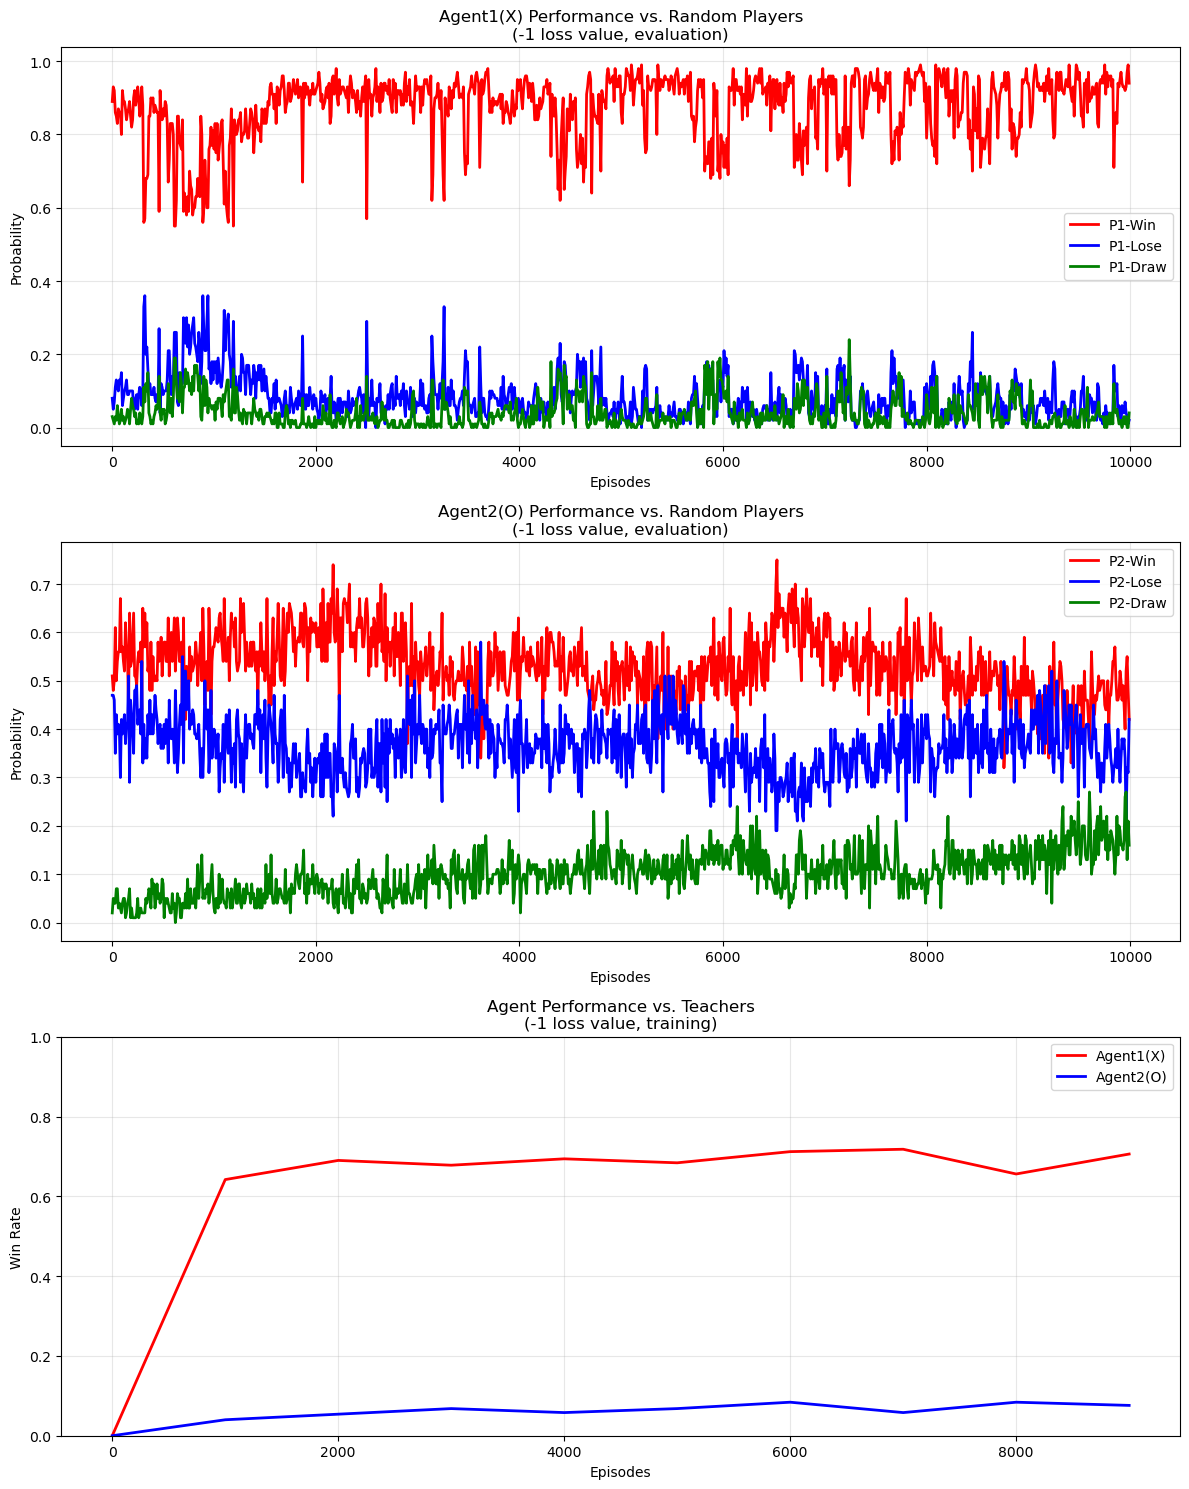

In [18]:
# Create detailed visualization
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 15))

# Plot 1: Agent1 Performance vs Random Players
ax1.plot(perf_detailed[0], perf_detailed[1], label='P1-Win', color='red', linewidth=2)
ax1.plot(perf_detailed[0], perf_detailed[2], label='P1-Lose', color='blue', linewidth=2)
ax1.plot(perf_detailed[0], perf_detailed[3], label='P1-Draw', color='green', linewidth=2)
ax1.set_xlabel('Episodes')
ax1.set_ylabel('Probability')
ax1.set_title('Agent1(X) Performance vs. Random Players\n({0} loss value, evaluation)'.format(p1_detailed.lossval))
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Agent2 Performance vs Random Players  
ax2.plot(perf_detailed[0], perf_detailed[4], label='P2-Win', color='red', linewidth=2)
ax2.plot(perf_detailed[0], perf_detailed[5], label='P2-Lose', color='blue', linewidth=2)
ax2.plot(perf_detailed[0], perf_detailed[6], label='P2-Draw', color='green', linewidth=2)
ax2.set_xlabel('Episodes')
ax2.set_ylabel('Probability')
ax2.set_title('Agent2(O) Performance vs. Random Players\n({0} loss value, evaluation)'.format(p1_detailed.lossval))
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Combined Training Performance vs Teachers
ax3.plot(training_episodes_detailed, agent1_training_wins_detailed, color='red', linewidth=2, label='Agent1(X)')
ax3.plot(training_episodes_detailed, agent2_training_wins_detailed, color='blue', linewidth=2, label='Agent2(O)')
ax3.set_xlabel('Episodes')
ax3.set_ylabel('Win Rate')
ax3.set_title('Agent Performance vs. Teachers\n({0} loss value, training)'.format(p1_detailed.lossval))
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.set_ylim(0, 1)

plt.tight_layout()
plt.show()

## 5. Interactive Play

Play against the trained agent! (Note: This section works best in a local Jupyter environment)

In [41]:
# Interactive play function for Jupyter
def play_against_agent(agent, num_games=1):
    """Play against the trained agent in Jupyter"""
    print("\n" + "="*50)
    print("Playing against the trained agent!")
    print("You are X, Agent is O")
    print("="*50)
    
    agent.verbose = True
    
    for game in range(num_games):
        print(f"\n=== Game {game + 1} ===")
        human_player = Human(PLAYER_X)
        winner = play(human_player, agent)
        
        if winner == PLAYER_X:
            print("🎉 Congratulations! You won!")
        elif winner == PLAYER_O:
            print("🤖 The agent won this time!")
        else:
            print("🤝 It's a draw!")
            
        human_player.episode_over(winner)
        agent.episode_over(winner)

# Uncomment the line below to play against the agent
play_against_agent(p2_detailed, num_games=1)


Playing against the trained agent!
You are X, Agent is O

=== Game 1 ===

Player X's turn:
----------------------------
|        |        |        |
|--------------------------|
|        |        |        |
|--------------------------|
|        |        |        |
----------------------------
Enter move as row,col (0-2): 

 1,1


----------------------------
| 0.000  | -0.990 | 0.000  |
|--------------------------|
| 0.000  |   X    | -0.985 |
|--------------------------|
| 0.000  | -1.000 | 0.500  |
----------------------------
>>>>>>> Best action: (2, 2)

Player X's turn:
----------------------------
|        |        |        |
|--------------------------|
|        |   X    |        |
|--------------------------|
|        |        |   O    |
----------------------------
Enter move as row,col (0-2): 

 2,1


----------------------------
| -0.985 | 0.000  | -1.000 |
|--------------------------|
| -0.985 |   X    | -0.985 |
|--------------------------|
| -0.985 |   X    |   O    |
----------------------------
>>>>>>> Best action: (0, 1)

Player X's turn:
----------------------------
|        |   O    |        |
|--------------------------|
|        |   X    |        |
|--------------------------|
|        |   X    |   O    |
----------------------------
Enter move as row,col (0-2): 

 2,0


----------------------------
| 0.500  |   O    | 1.000  |
|--------------------------|
| 0.500  |   X    | 0.500  |
|--------------------------|
|   X    |   X    |   O    |
----------------------------
>>>>>>> Best action: (0, 2)

Player X's turn:
----------------------------
|        |   O    |   O    |
|--------------------------|
|        |   X    |        |
|--------------------------|
|   X    |   X    |   O    |
----------------------------
Enter move as row,col (0-2): 

 1,2


----------------------------
| 0.490  |   O    |   O    |
|--------------------------|
| 0.000  |   X    |   X    |
|--------------------------|
|   X    |   X    |   O    |
----------------------------
>>>>>>> Best action: (0, 0)
🤖 The agent won this time!
You lost!
